<a href="https://colab.research.google.com/github/thotasriharsha/GENERATIVE-AI2/blob/main/2303A52159_WEEK_10__ASS_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (1 ponto) Build and train a Convolutional Neural Network (CNN) for image classification using
the MNIST dataset (handwritten digits) or any custom dataset.
2. (1 ponto) Calculate the accuracy with training and testing data
Tabela 1: ANN Architecture
Layer Filters Activation Function Kernal Size
Convolution Layer - 1 33 relu (3,3)
Max Pooling Layer - 1 – – (2,2)
Convolution Layer - 2 64 relu (3,3)
Max Pooling Layer - 2 – – (2,2)
Dense Layer 128 Relu –
Tabela 2: Training Parameters
epochs batch size error metric Optimizer
30 32 accuracy adam
Dataset: MNIST
• Expected learning Outcomes from this assignment related to python
– Students are able to build CNN model with python deep learning libraries to classify
hand written digits
– Students are able to measure training and testing performance of trained model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 34ms/step - accuracy: 0.9108 - loss: 0.2839 - val_accuracy: 0.9867 - val_loss: 0.0386
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9872 - loss: 0.0419 - val_accuracy: 0.9905 - val_loss: 0.0285
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 29ms/step - accuracy: 0.9912 - loss: 0.0272 - val_accuracy: 0.9899 - val_loss: 0.0308
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9871 - val_loss: 0.0410
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9951 - loss: 0.0156 - val_accuracy: 0.9906 - val_loss: 0.0316
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.9912 - val_loss: 0.0292
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9973 - loss: 0.0089 - val_accuracy: 0.9917 - val_loss: 0.0297
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9978 -

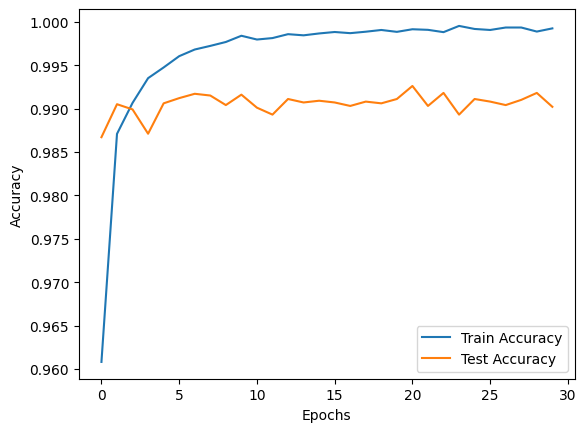

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))


train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f'Training Accuracy: {train_acc * 100:.2f}%')
print(f'Testing Accuracy: {test_acc * 100:.2f}%')


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()